# Lecture 7: Option Valuation
This class will discuss the valuation of European and American options. We will consider the valuation of both call and put option types. We will be discussing the Black-Scholes-Merton (BSM) model for pricing options. We will then talk about the binomial option pricing model as time permits.

For this class, you can follow the option valuation discussions from the 'Valuation' section of Chapter 12 of textbook (pg. 375-383). We have previously talked about simulating stock prices, you can follow these discussions at pg. 356-357 of the textbook. 

### Import necessary packages

In [1]:
import numpy as np    
import pandas as pd
import datetime as dt  
import pandas_datareader.data as web             # Downloading data from web
import matplotlib as mpl                         # Plots
import matplotlib.pyplot as plt
import math
import numpy.random as npr  

# Option Strategies

Let's start by defining the payoff functions for call and put options.

In [2]:
def call_pl(ST, K, premium = 0):
    return np.maximum(ST - K, 0) - premium

In [3]:
def put_pl(ST, K, premium = 0):
    return np.maximum(K - ST, 0) - premium

We now have our payoff functions ready. Let's construct some option portfolios. Suppose we have a stock that can have prices ranging from 0 to 200 next year. 

Suppose we also have the following options available:
* Call 1: K=100, premium=10; Call 2: K=150, premium=5; Call 3: K=175, premium=5
* Put 1:  K=100, premium=10; Put 2:  K=50,  premium=5;  Put 3: K=25,  premium=5

Following are some of the portfolios we can construct using these options.

In [135]:
ST = np.arange(0, 201, 1)
ST

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

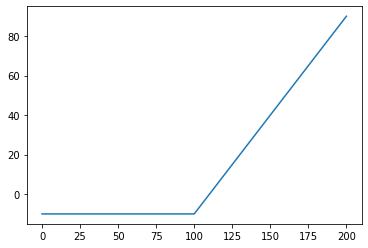

In [136]:
plt.plot(ST, call_pl(ST, 100, 10));

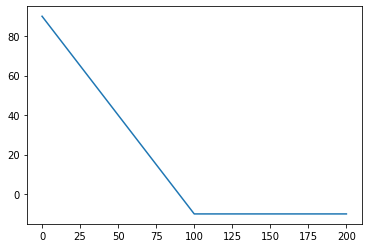

In [137]:
plt.plot(ST, put_pl(ST, 100, 10));

In [138]:
portfolio_pl = call_pl(ST, 100, 10) + put_pl(ST, 100, 10)

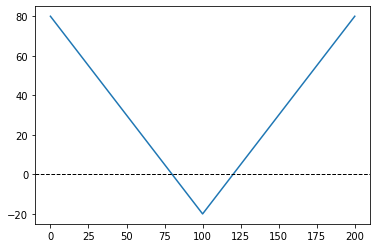

In [139]:
plt.plot(ST, portfolio_pl);
plt.axhline(y=0, color = 'k', linestyle='--', lw = 1)

In [140]:
portfolio_pl = call_pl(ST, 100, 10) + put_pl(ST, 100, 10) \
+ (-1) * call_pl(ST, 150, 5) + (-1) * put_pl(ST, 50, 5)

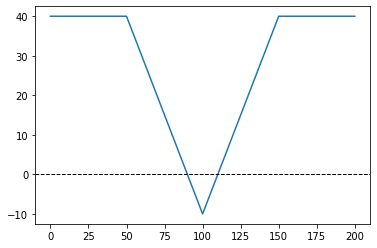

In [141]:
plt.plot(ST, portfolio_pl)
plt.axhline(y=0, color = 'k', linestyle='--', lw = 1);

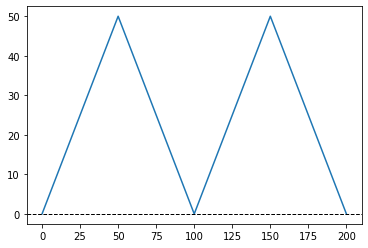

In [142]:
portfolio_pl = call_pl(ST, 100, 10) + put_pl(ST, 100, 10) \
+ (-2) * call_pl(ST, 150, 5) + (-2) * put_pl(ST, 50, 5) \

plt.plot(ST, portfolio_pl)
plt.axhline(y=0, color = 'k', linestyle='--', lw = 1);

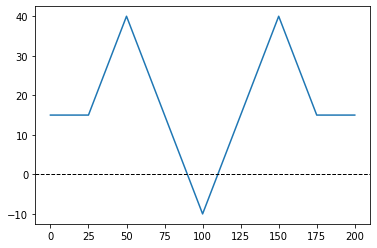

In [144]:
portfolio_pl = call_pl(ST, 100, 10) + put_pl(ST, 100, 10) \
+ (-2) * call_pl(ST, 150, 5) + (-2) * put_pl(ST, 50, 5) \
+ call_pl(ST, 175, 5) + put_pl(ST, 25, 5)

plt.plot(ST, portfolio_pl)
plt.axhline(y=0, color = 'k', linestyle='--', lw = 1);

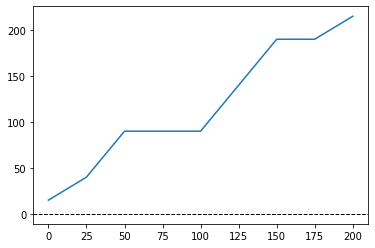

In [145]:
portfolio_pl = call_pl(ST, 100, 10) + put_pl(ST, 100, 10) \
+ (-2) * call_pl(ST, 150, 5) + (-2) * put_pl(ST, 50, 5) \
+ call_pl(ST, 175, 5) + put_pl(ST, 25, 5) \
+ ST

plt.plot(ST, portfolio_pl)
plt.axhline(y=0, color = 'k', linestyle='--', lw = 1);

## Simulating Stock Prices

In [3]:
np.set_printoptions(precision=2)    # Results show only the first two digits of decimals. Optional code for visual purposes.

We simulate the stock prices according to Black-Scholes-Merton setup. According to this setup the future level of stock prices are determined according to following formula:
\begin{equation*}
S_T = S_0 exp \left(\left(r - \frac12\ \sigma^2 \right) T + \sigma \sqrt{T} z \right)
\end{equation*}

where 
* $S_T$ is the stock price at date $T$,
* $r$ is the constant risk-free short rate,
* $\sigma$ is the standard deviation of returns of $S$, and
* $z$ is standard normally distributed random variable.

In [4]:
S0 = 100                          # Stock's spot price (i.e., current price)
r = 0.05                          # Risk-free short rate
sigma = 0.25                      # Standard deviation of stock returns
T = 2.0                           # The horizon in year fractions
I = 10                            # Number of simulations
ST1 = S0 * np.exp((r - 0.5 * sigma ** 2) * T + sigma * math.sqrt(T) * npr.standard_normal(I))  
print(S0)
print(ST1)

100
[179.79 130.2  152.63  93.48  47.71 170.46  96.67 114.16  51.99 192.43]


We next generate the stock prices in the dynamic form of Black-Scholes-Merton setup. The difference is, we now simulate the stock prices step-by-step, instead of simulating a single price into the future over our investment horizon. Our simulation formula is now as follows:
\begin{equation*}
S_t = S_{t-\Delta t} exp \left(\left(r - \frac12\ \sigma^2 \right) \Delta t + \sigma \sqrt{\Delta t} z_t \right)
\end{equation*}

where 
* $S_t$ is the stock price at date $t$, 
* $\Delta t$ is the step size,
* $r$ is the constant riskless short rate, 
* $\sigma$ is the standard deviation of returns of $S$, and 
* $z$ is standard normally distributed random variable.

In [5]:
I = 100  
M = 50      # Number of time intervals.
dt = T / M  
S = np.zeros((M+1, I))  
S[0] = S0  
for t in range(1, M + 1):
    S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * math.sqrt(dt) * npr.standard_normal(I)) 

In [21]:
S

array([[100.  , 100.  , 100.  , ..., 100.  , 100.  , 100.  ],
       [ 95.96,  91.96,  95.16, ..., 103.  ,  99.17, 101.69],
       [ 91.11,  96.48,  95.73, ..., 101.9 , 106.63, 105.18],
       ...,
       [102.9 , 127.22, 126.85, ..., 152.1 , 181.39, 177.09],
       [112.83, 122.15, 123.31, ..., 152.49, 177.48, 184.47],
       [113.74, 124.1 , 129.86, ..., 157.29, 173.41, 194.22]])

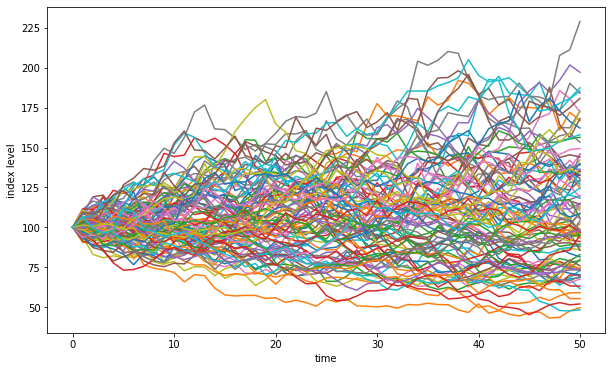

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(S[:, :100], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level');

### Eliminating the Bias in Simulations

In [7]:
def gen_sn(M, I, anti_paths = True, mo_match = True):
    # M: Number of time intervals,                  I: Number of paths to be simulated.
    # anti_paths: Use of antithetic variates,       mo_match: Use of moment matching.
    if anti_paths == True:
        sn = npr.standard_normal((M + 1, int(I / 2)))
        sn = np.concatenate((sn, -sn), axis = 1)
    else:
        sn = npr.standard_normal((M + 1, I))
    if mo_match == True:
        sn = (sn - sn.mean()) / sn.std()
    return sn

In [8]:
gen_sn(50, 1000)

array([[ 0.22,  0.66, -0.11, ..., -1.05, -0.05, -0.47],
       [-0.47, -0.38, -0.58, ..., -0.25, -0.31, -1.49],
       [ 0.4 , -0.  ,  2.11, ...,  0.11,  1.67, -0.67],
       ...,
       [ 1.11, -0.85,  1.29, ..., -1.88, -0.88,  0.92],
       [ 1.67, -1.15, -0.77, ...,  0.34,  0.07, -0.55],
       [-2.06, -0.04,  0.34, ..., -0.64, -0.98,  0.77]])

## Valuation

### European Options
The payoff of a European call option on a stock at maturity is given as:

\begin{equation*}
h\left(S_T\right) \equiv max \left(S_T - K, 0\right)
\end{equation*}

where $S_T$ is the stock price at maturity date $T$, and $K$ is the strike price. The price for this option is then expressed as follows:

\begin{equation*}
C_0 = e^{-rT}E_0^Q \left( h\left(S_T\right) \right) = e^{-rT} \int_{0}^\infty h\left(s\right) q\left(s\right) ds 
\end{equation*}

With finite Monte Carlo simulations (number of simulations = $I$), this formula transforms to:

\begin{equation*}
\tilde{C_0} = e^{-rT} \frac1I \sum_{i=0}^I h\left(\tilde{S_T^i}\right)
\end{equation*}

As we increase the number of simulations $I$, $\tilde{C_0}$ approaches to the true price of the option: $C_0$.

#### Static simulation

In [19]:
S0 = 100.                # Stock price at the beginning
r = 0.05                 # Risk-free interest rates (or discount rate)
sigma = 0.25             # Standard deviation of stock price
T = 1.0                  # Maturity of the option (for European options, this is also the exercise date)
I = 50000                # Number of simulations

In [35]:
def gbm_mcs_stat(K):
    sn = gen_sn(1, I)
    ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T + sigma * math.sqrt(T) * sn[1])
    hT = np.maximum(ST - K, 0)
    C0 = math.exp(-r * T) * np.mean(hT)
    return C0

In [44]:
gbm_mcs_stat(105.)

10.010848827633112

#### Dynamic simulation
We next allow for dynamic simulations. Our simulation process now allows for step-by-step generation of stock prices.

In addition, we update our pricing function to allow for the calculation of call as well as put option prices.

In [20]:
M = 50                    # Number of time periods for discretization

In [37]:
def gbm_mcs_dyna(K, option = 'call'):
    dt = T / M
    S = np.zeros((M + 1, I))
    S[0] = S0
    sn = gen_sn(M , I)
    for t in range(1, M + 1):
        S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * math.sqrt(dt) * sn[t])
    if option == 'call':
        hT = np.maximum(S[-1] - K, 0)
    else:
        hT = np.maximum(K - S[-1], 0)
    C0 = math.exp(-r * T) * np.mean(hT)
    return C0

In [38]:
gbm_mcs_dyna(K = 110., option = 'call')

8.02548589470631

In [39]:
gbm_mcs_dyna(K = 110., option = 'put')

12.635340061072068

### Black-Scholes-Merton model

The analytical formula developed by Fisher Black, Myron Scholes, and Robert Merton for pricing call and put options is as follows:

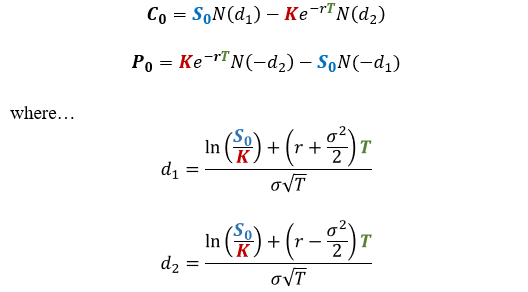

In [40]:
from scipy import stats   # Needed for cumulative distribution functions (cdf).

In [148]:
def bsm_option_price(S0, K, T, r, sigma, option = 'call'):
    #S0 = float(S0)
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * math.sqrt(T))
    d2 = (np.log(S0 / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * math.sqrt(T))
    if option == 'call':
        value = (S0 * stats.norm.cdf(d1, 0.0, 1.0)) - K * np.exp(-r * T) * stats.norm.cdf(d2, 0.0, 1.0)
    else: 
        value =  K * np.exp(-r * T) * stats.norm.cdf(-1*d2, 0.0, 1.0) - (S0 * stats.norm.cdf(-1*d1, 0.0, 1.0))
    return value

In [11]:
bsm_option_price(100, 110, 1, 0.05, 0.25, 'call')

8.026384693853352

In [12]:
bsm_option_price(100, 110, 1, 0.05, 0.25, 'put')

12.661621388931913

### American Options

In [76]:
def gbm_mcs_amer(K, option = 'call'):
    dt = T / M
    df = math.exp(-r * dt)
    S = np.zeros((M + 1, I))
    S[0] = S0
    sn = gen_sn(M, I)
    for t in range(1, M + 1):
        S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * math.sqrt(dt) * sn[t])
        if option == 'call':
            h = np.maximum(S - K, 0)
        else:
            h = np.maximum(K - S, 0)
    V = np.copy(h)
    for t in range(M - 1, 0, -1):
        reg = np.polyfit(S[t], V[t + 1] * df, 7)
        C = np.polyval(reg, S[t])
        V[t] = np.where(C > h[t], V[t + 1] * df, h[t])
    C0 = df * np.mean(V[1])
    return C0

In [81]:
gbm_mcs_amer(K = 110., option = 'call')

7.808976594581032

In [78]:
gbm_mcs_amer(K = 110., option = 'put')

13.644103148234377

## Binomial Option Pricing

In [146]:
def binomial_model_call(S0, K, u, r, T):
    d = 1 / u
    p = (1 + r - d) / (u - d)
    q = 1 - p
    # Make stock price tree
    stock = np.zeros([T + 1, T + 1])
    for i in range(T + 1):
        for j in range(i + 1):
            stock[j, i] = S0 * (u ** (i - j)) * (d ** j)
    # Generate option prices recursively
    option = np.zeros([T + 1, T + 1])
    option[:, T] = np.maximum(np.zeros(T + 1), (stock[:, T] - K))
    for i in range(T - 1, -1, -1):
        for j in range(0, i + 1):
            option[j, i] = (1 / (1 + r) * (p * option[j, i + 1] + q * option[j + 1, i + 1]))
    return stock, option

In [147]:
binomial_model_call(100, 110, 1.1, 0.01, 2)

(array([[100.  , 110.  , 121.  ],
        [  0.  ,  90.91, 100.  ],
        [  0.  ,   0.  ,  82.64]]), array([[ 3.01,  5.76, 11.  ],
        [ 0.  ,  0.  ,  0.  ],
        [ 0.  ,  0.  ,  0.  ]]))

In [109]:
binomial_model_call(100, 110, 1.1, 0.01, 2)[0]

array([[100.  , 110.  , 121.  ],
       [  0.  ,  90.91, 100.  ],
       [  0.  ,   0.  ,  82.64]])

In [110]:
binomial_model_call(100, 110, 1.1, 0.01, 2)[1]

array([[ 3.01,  5.76, 11.  ],
       [ 0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ]])

In [99]:
def binomial_model_put(S0, K, u, r, T):
    d = 1 / u
    p = (1 + r - d) / (u - d)
    q = 1 - p
    # Make stock price tree
    stock = np.zeros([T + 1, T + 1])
    for i in range(T + 1):
        for j in range(i + 1):
            stock[j, i] = S0 * (u ** (i - j)) * (d ** j)
    # Generate option prices recursively
    option = np.zeros([T + 1, T + 1])
    option[:, T] = np.maximum(np.zeros(T + 1), (K - stock[:, T]))
    for i in range(T - 1, -1, -1):
        for j in range(0, i + 1):
            option[j, i] = (1 / (1 + r) * (p * option[j, i + 1] + q * option[j + 1, i + 1]))
    return stock, option

In [107]:
binomial_model_put(100, 110, 1.1, 0.01, 2)[0]

array([[100.  , 110.  , 121.  ],
       [  0.  ,  90.91, 100.  ],
       [  0.  ,   0.  ,  82.64]])

In [108]:
binomial_model_put(100, 110, 1.1, 0.01, 2)[1]

array([[10.85,  4.67,  0.  ],
       [ 0.  , 18.  , 10.  ],
       [ 0.  ,  0.  , 27.36]])

## Exercises

### Exercise: Bear Spread

In [4]:
def call_pl(ST, K, premium = 0):
    return np.maximum(ST - K, 0) - premium
def put_pl(ST, K, premium = 0):
    return np.maximum(K - ST, 0) - premium

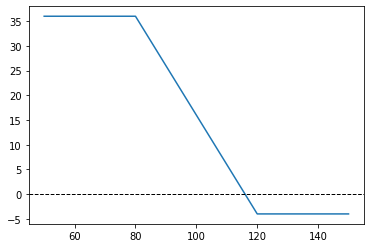

In [9]:
ST = np.arange(50, 151, 1)
portfolio_pl = put_pl(ST, 120, 10) + put_pl(ST, 80, 6) * -1
plt.plot(ST, portfolio_pl)
plt.axhline(y=0, color = 'k', linestyle='--', lw = 1);

### Exercise: Expected Payoff of European Calls

In [32]:
from scipy import stats   
def bsm_option_price(S0, K, T, r, sigma, option = 'call'):
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * math.sqrt(T))
    d2 = (np.log(S0 / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * math.sqrt(T))
    if option == 'call':
        value = (S0 * stats.norm.cdf(d1, 0.0, 1.0)) - K * np.exp(-r * T) * stats.norm.cdf(d2, 0.0, 1.0)
    else: 
        value =  K * np.exp(-r * T) * stats.norm.cdf(-1*d2, 0.0, 1.0) - (S0 * stats.norm.cdf(-1*d1, 0.0, 1.0))
    return value

In [34]:
bsm_option_price(100, 100, 1, 0.05, 0.20, 'call')

10.450583572185565

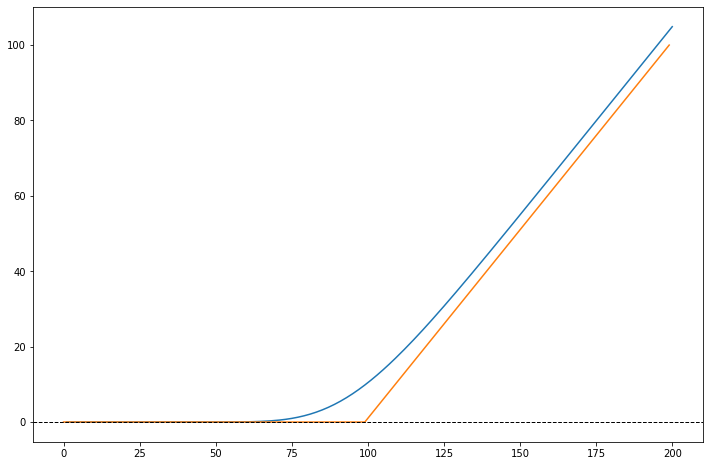

In [37]:
S0 = np.arange(1, 201, 1)
bsm_prices = bsm_option_price(S0, 100, 1, 0.05, 0.20, 'call')
portfolio_pl = call_pl(S0, 100, 0)

plt.figure(figsize = (12, 8))
plt.plot(S0, bsm_prices, portfolio_pl)
plt.axhline(y=0, color = 'k', linestyle='--', lw = 1);

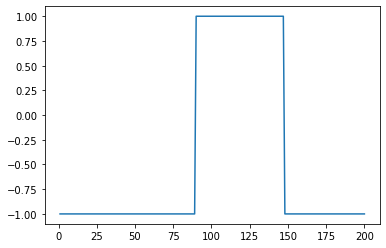

In [31]:
s_buy = np.where(bsm_prices > portfolio_pl + 5, 1, -1)
plt.plot(S0, s_buy);

### Exercise: Combining Calls and Puts

In [39]:
def bsm_option_price_prem(S0, K, T, r, sigma, option = 'call', premium = 0):
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * math.sqrt(T))
    d2 = (np.log(S0 / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * math.sqrt(T))
    if option == 'call':
        value = (S0 * stats.norm.cdf(d1, 0.0, 1.0)) - K * np.exp(-r * T) * stats.norm.cdf(d2, 0.0, 1.0)
    else: 
        value =  K * np.exp(-r * T) * stats.norm.cdf(-1*d2, 0.0, 1.0) - (S0 * stats.norm.cdf(-1*d1, 0.0, 1.0))
    return value - premium

In [40]:
bsm_option_price_prem(100, 100, 1, 0.05, 0.20, 'call', 5)

5.450583572185565

In [41]:
bsm_option_price_prem(100, 100, 1, 0.05, 0.20, 'put', 5)

0.5735260222569707

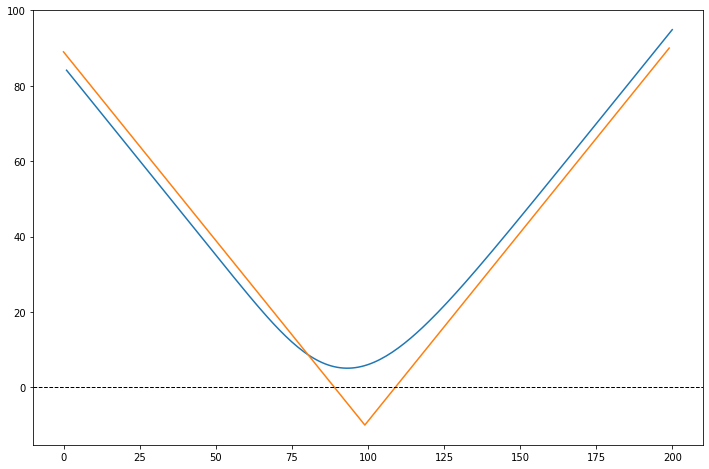

In [50]:
portfolio_pl = call_pl(S0, 100, 5) + put_pl(S0, 100, 5)
portfolio_pl_bsm = bsm_option_price_prem(S0, 100, 1, 0.05, 0.20, 'call', 5) + bsm_option_price_prem(S0, 100, 1, 0.05, 0.20, 'put', 5)

plt.figure(figsize = (12, 8))
plt.plot(S0, portfolio_pl_bsm, portfolio_pl)
plt.axhline(y=0, color = 'k', linestyle='--', lw = 1);

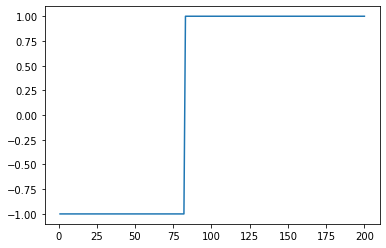

In [51]:
s_buy = np.where(portfolio_pl_bsm > portfolio_pl, 1, -1)
plt.plot(S0, s_buy);

### Exercise: Binomial Option Pricing

In [46]:
def binomial_model_call(S0, K, u, r, T):
    d = 1 / u
    p = (1 + r - d) / (u - d)
    q = 1 - p
    # Make stock price tree
    stock = np.zeros([T + 1, T + 1])
    for i in range(T + 1):
        for j in range(i + 1):
            stock[j, i] = S0 * (u ** (i - j)) * (d ** j)
    # Generate option prices recursively
    option = np.zeros([T + 1, T + 1])
    option[:, T] = np.maximum(np.zeros(T + 1), (stock[:, T] - K))
    for i in range(T - 1, -1, -1):
        for j in range(0, i + 1):
            option[j, i] = (1 / (1 + r) * (p * option[j, i + 1] + q * option[j + 1, i + 1]))
    return option[0, 0]

In [49]:
binomial_model_call(100, 100, 1.2, 0.02, 3)

16.24496078441001